In [2]:
import sys
sys.path.append('/eos/user/l/lkoller/SWAN_projects/data analysis 2024/LyA/commands')
sys.path.append('/eos/user/l/lkoller/SWAN_projects/data analysis 2024/Data loader')

from Ldate import Ldate
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.optimize as sci
from readTrc_4CH import Trc
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [3]:
def sinfunc(x,A,w,p,c):
    return A*np.sin(w*x + p) + c

def sinfit(xx, yy):
    xx = np.array(xx)
    yy = np.array(yy)
    ff = np.fft.fftfreq(len(xx), (xx[1]-xx[0]))
    Fyy = abs(np.fft.fft(yy))
    guess_freq = abs(ff[np.argmax(Fyy[1:])+1])
    guess_amp = np.std(yy) * 2.**0.5
    guess_offset = np.mean(yy)
    guess = np.array([guess_amp, 2.*np.pi*guess_freq, 0., guess_offset])
    popt, pcov = sci.curve_fit(sinfunc, xx, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*np.pi)
    fitfunc = lambda x: A * np.sin(w*x + p) + c
    return fitfunc

def plot_fit(file, cl = 3000, ch = 3300):
    data = Trc().open(file)
    xa = np.linspace(0,10001,10002)
    xs = np.linspace(cl, ch, ch - cl + 1)
    
    fig = plt.figure(layout = 'tight', figsize = (25,12))
    gs = GridSpec(4, 1, figure = fig)
    ax1 = fig.add_subplot(gs[0,0])
    ax2 = fig.add_subplot(gs[1,0])
    ax3 = fig.add_subplot(gs[2,0])
    ax4 = fig.add_subplot(gs[3,0])
    
    for i, ax in enumerate(fig.axes):
        xc = xa[cl:ch]
        yc = data[1][i][cl:ch]
        ax.scatter(xc, yc, color = 'black')
        fitc = sinfit(xc, yc)
        ax.plot(xs, fitc(xs), color = 'red')
        ax.set_xlabel(xlabel = 'Timesteps')
        ax.set_ylabel(ylabel = 'Voltage')
        ax.set_title(label = 'Channel %i' % (i+1))
    
    return

def fit_file(file):
    data = Trc().open(file)
    yy = data[1]
    xx = np.linspace(0,10001,10002)
    func = [0,0,0,0] #for the fits of the 4 channels
    
    for i in range(4):
        func[i] = sinfit(xx[8000:10000], yy[i][8000:10000])
    
    return func
    

In [4]:
file1 = '/eos/experiment/gbar/pgunpc/data/24_05_16/24_05_16lya/LY1234.1715885866.981.trc' #mw on, high noise
file2 = '/eos/experiment/gbar/pgunpc/data/24_04_30/24_04_30lya/LY1234.1714469387.733.trc' #mw on, low noise

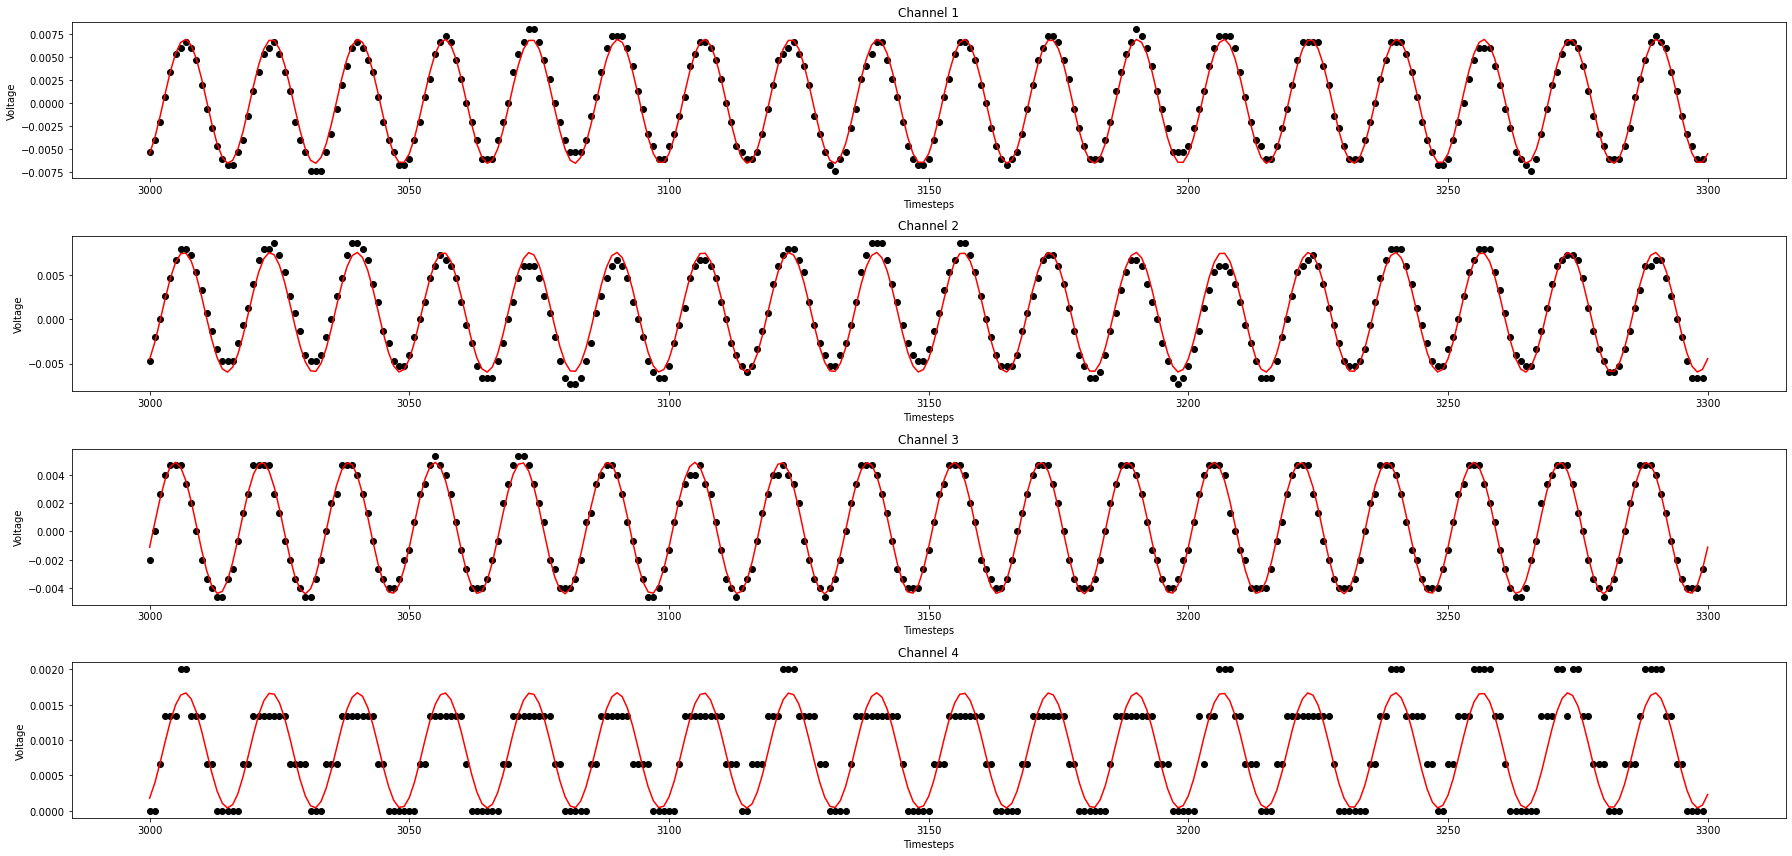

In [7]:
plot_fit(file1)

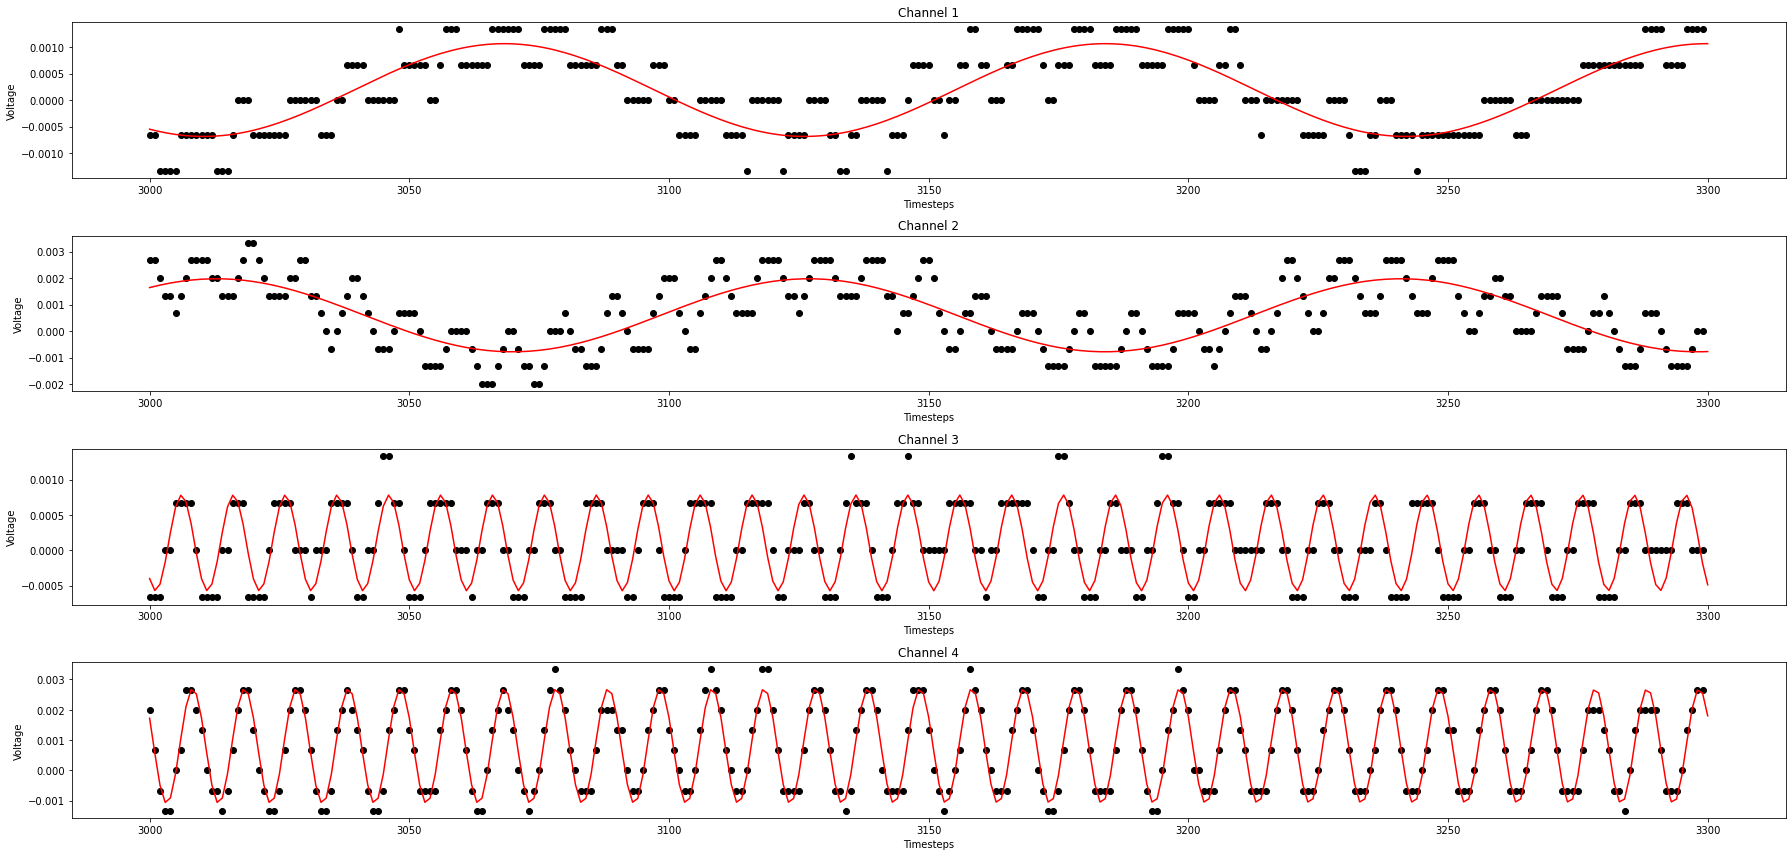

In [8]:
plot_fit(file2)

In [5]:
data1 = Trc().open(file1)
data2 = Trc().open(file2)

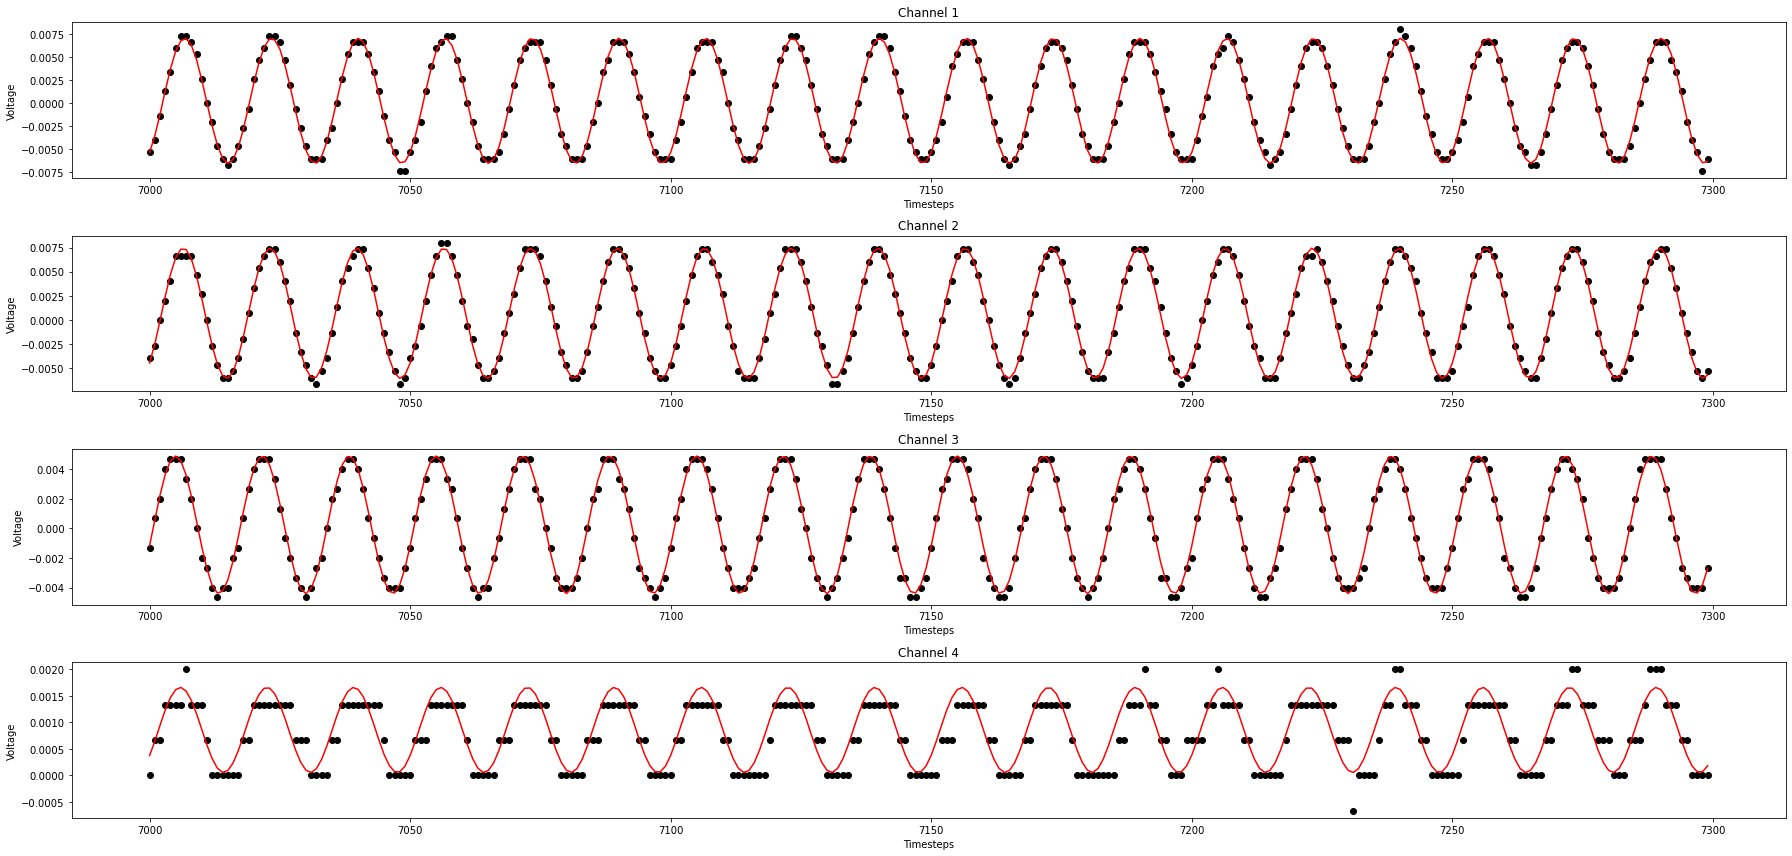

In [29]:
filec = file1
#trange = [0,10001]
trange = [7000,7300]

data = Trc().open(filec)
fitc = fit_file(filec)
xc = np.linspace(0,10001,10002)
yc = data[1]

fig = plt.figure(layout = 'tight', figsize = (25,12))
gs = GridSpec(4, 1, figure = fig)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[2,0])
ax4 = fig.add_subplot(gs[3,0])

for i, ax in enumerate(fig.axes):
    ax.scatter(xc[trange[0]:trange[1]], yc[i][trange[0]:trange[1]], color = 'black')
    ax.plot(xc[trange[0]:trange[1]], fitc[i](xc[trange[0]:trange[1]]), color = 'red')
    ax.set_xlabel(xlabel = 'Timesteps')
    ax.set_ylabel(ylabel = 'Voltage')
    ax.set_title(label = 'Channel %i' % (i+1))

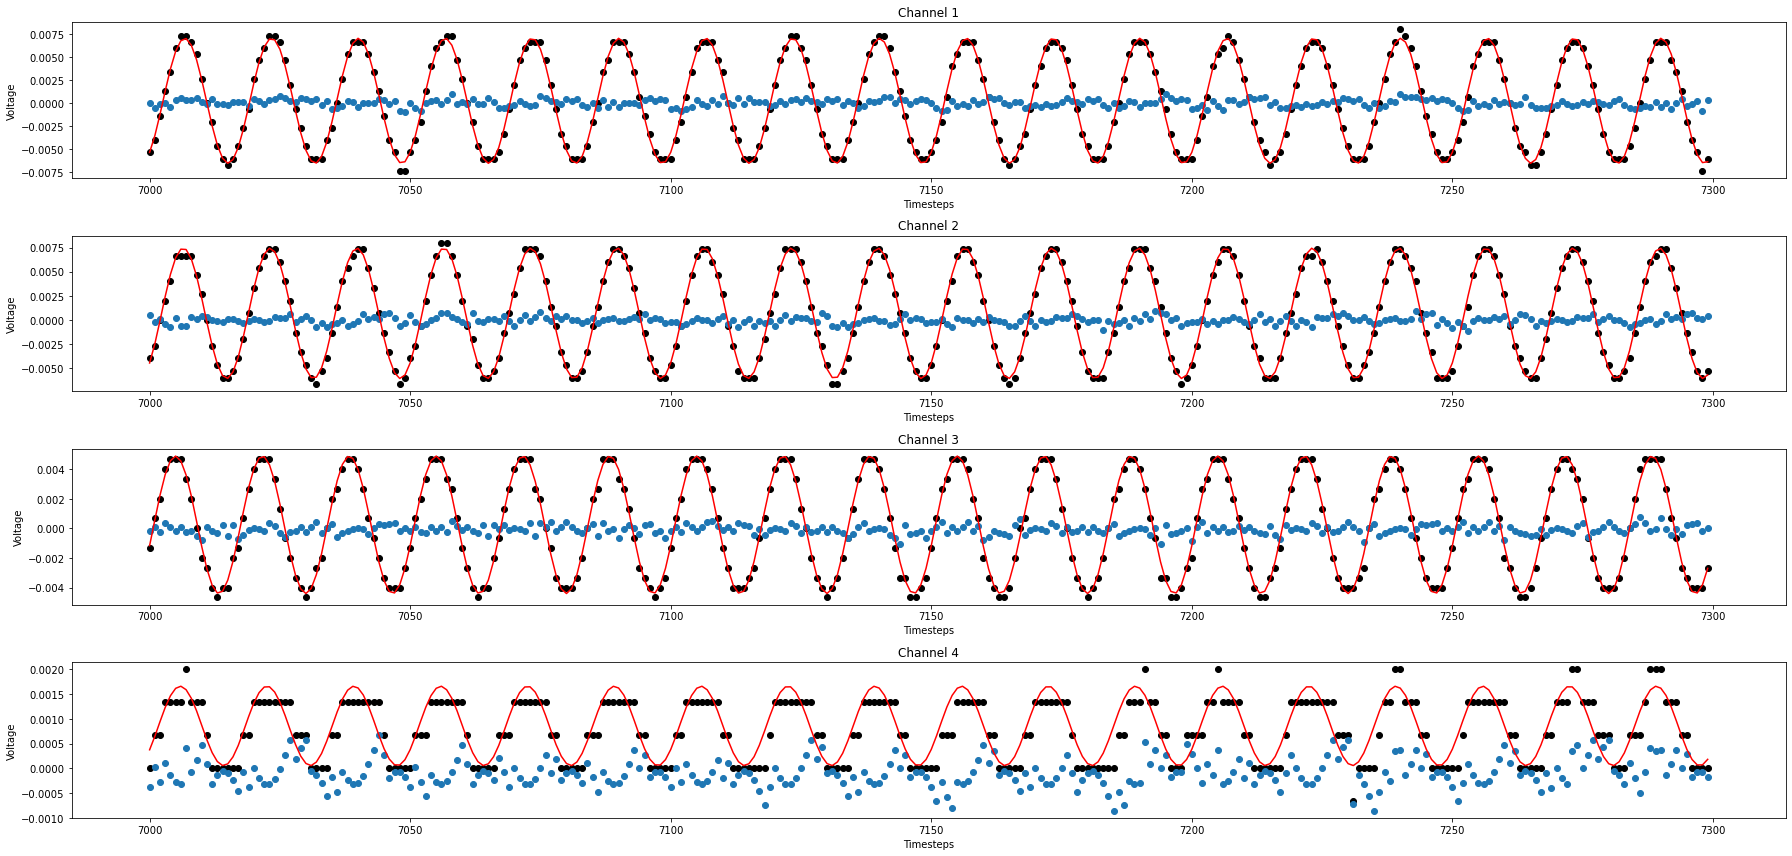

In [39]:
filec = file1
#trange = [0,10001]
start = 7000
trange = [start,start+300]

data = Trc().open(filec)
fitc = fit_file(filec)
xc = np.linspace(0,10001,10002)
yc = data[1]
ycc = [0,0,0,0]

fig = plt.figure(layout = 'tight', figsize = (25,12))
gs = GridSpec(4, 1, figure = fig)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[2,0])
ax4 = fig.add_subplot(gs[3,0])

for i in range(4):
    ycc[i] = [val - fitc[i](bal) for val,bal in zip(yc[i],xc)]

for i, ax in enumerate(fig.axes):
    ax.scatter(xc[trange[0]:trange[1]], yc[i][trange[0]:trange[1]], color = 'black')
    ax.scatter(xc[trange[0]:trange[1]], ycc[i][trange[0]:trange[1]])
    ax.plot(xc[trange[0]:trange[1]], fitc[i](xc[trange[0]:trange[1]]), color = 'red')
    ax.set_xlabel(xlabel = 'Timesteps')
    ax.set_ylabel(ylabel = 'Voltage')
    ax.set_title(label = 'Channel %i' % (i+1))

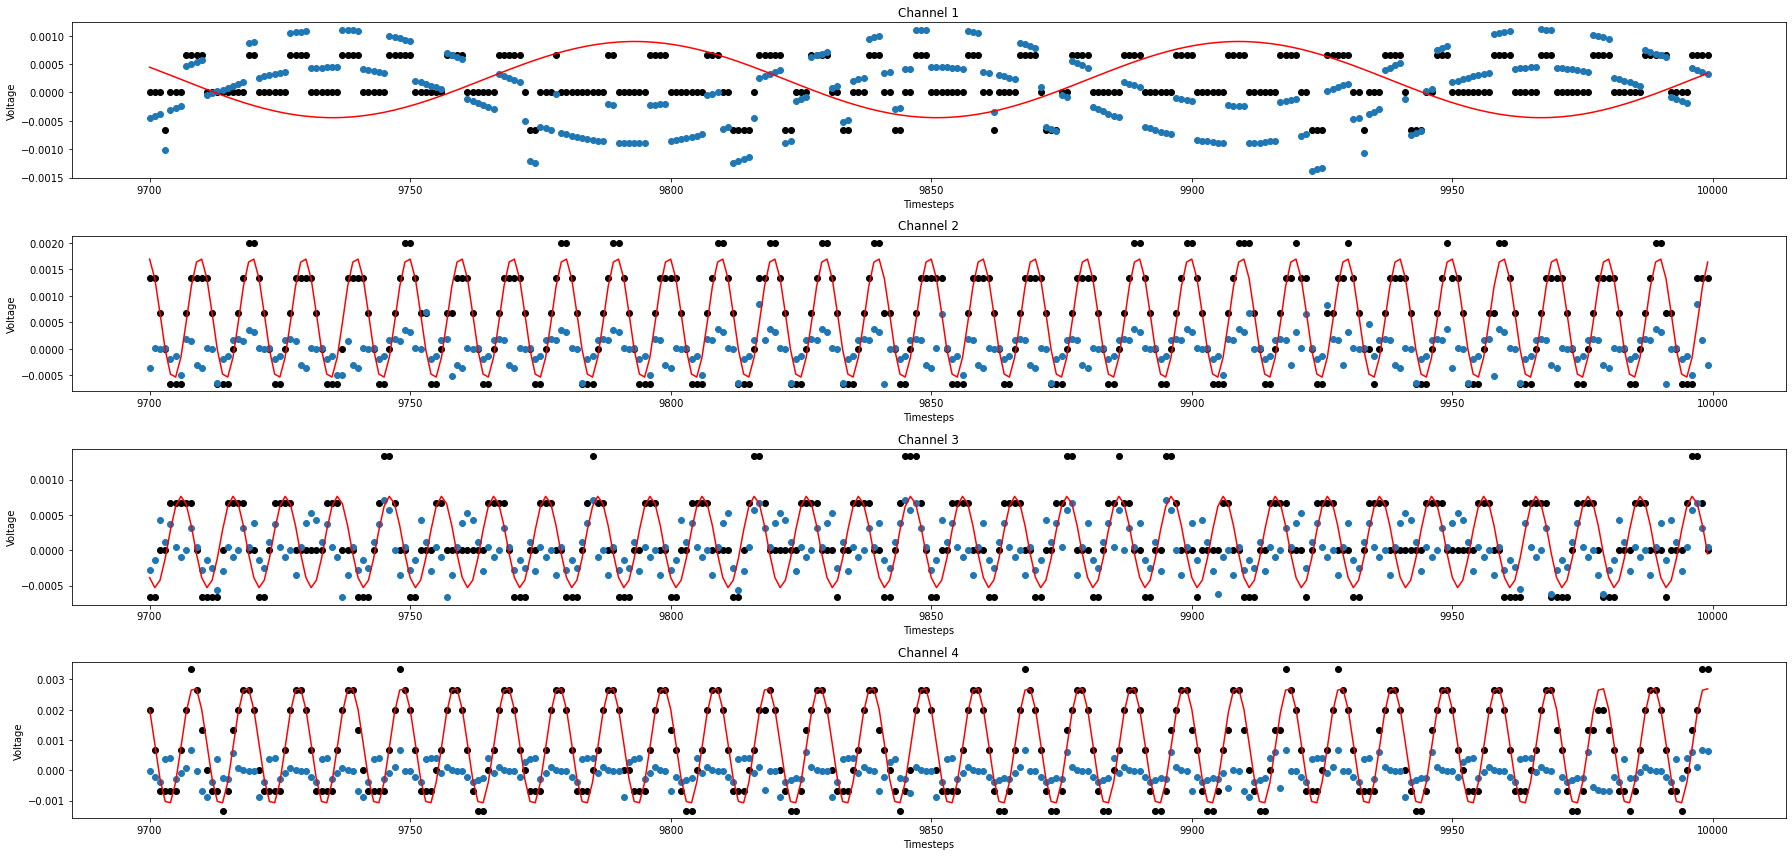

In [36]:
filec = file2
#trange = [0,10001]
start = 9700
trange = [start,start+300]

data = Trc().open(filec)
fitc = fit_file(filec)
xc = np.linspace(0,10001,10002)
yc = data[1]
ycc = [0,0,0,0]

fig = plt.figure(layout = 'tight', figsize = (25,12))
gs = GridSpec(4, 1, figure = fig)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[2,0])
ax4 = fig.add_subplot(gs[3,0])

for i in range(4):
    ycc[i] = [val - fitc[i](bal) for val,bal in zip(yc[i],xc)]

for i, ax in enumerate(fig.axes):
    ax.scatter(xc[trange[0]:trange[1]], yc[i][trange[0]:trange[1]], color = 'black')
    ax.scatter(xc[trange[0]:trange[1]], ycc[i][trange[0]:trange[1]])
    ax.plot(xc[trange[0]:trange[1]], fitc[i](xc[trange[0]:trange[1]]), color = 'red')
    ax.set_xlabel(xlabel = 'Timesteps')
    ax.set_ylabel(ylabel = 'Voltage')
    ax.set_title(label = 'Channel %i' % (i+1))

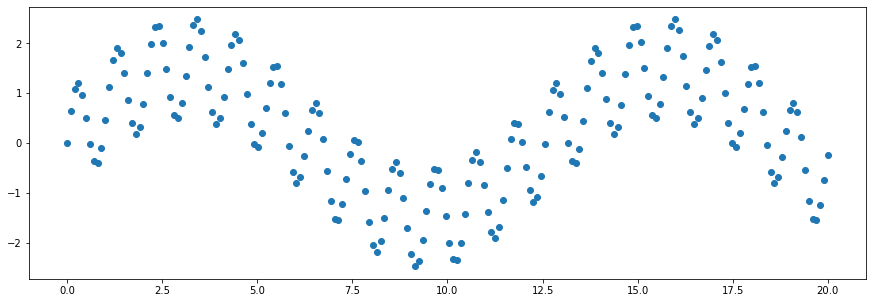

In [37]:
xt = np.linspace(0,20,200)
plt.figure(figsize = (15,5))
plt.scatter(xt, 1.5*np.sin(0.5*xt) + 1*np.sin(6*xt))